Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: <</insert link>>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [3]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [7]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

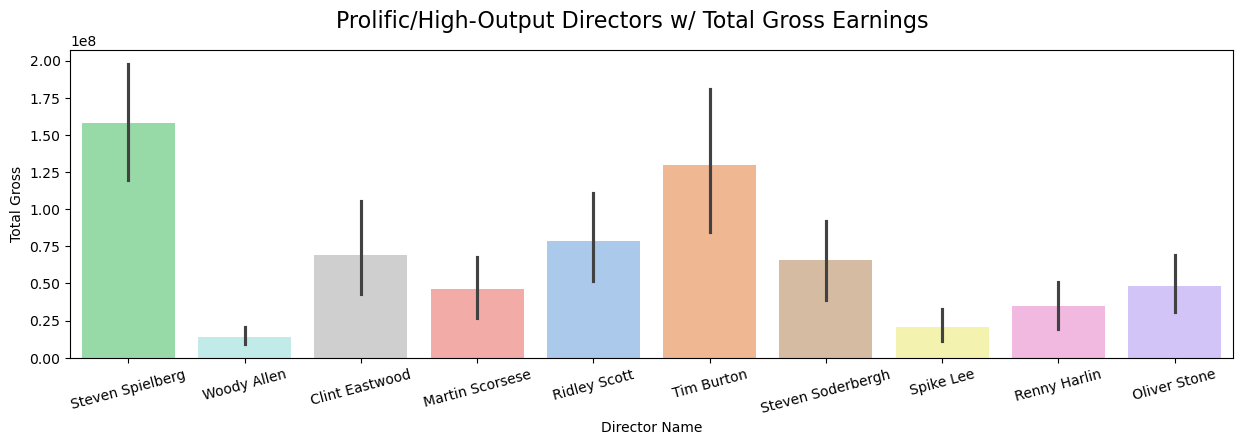

In [275]:
director_name_cleaned = data[data['director_name'] != '0']

top10_directors = director_name_cleaned['director_name'].value_counts().index[:10]

top10_data = director_name_cleaned[director_name_cleaned['director_name'].isin(top10_directors)]

plt.figure(figsize=(15,4))
sns.barplot(x="director_name", hue="director_name", y="gross", data=top10_data, order=top10_directors, palette='pastel')
plt.suptitle('Prolific/High-Output Directors w/ Total Gross Earnings', fontsize=16)
plt.xticks(rotation=15)
plt.xlabel('Director Name')
plt.ylabel('Total Gross')
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

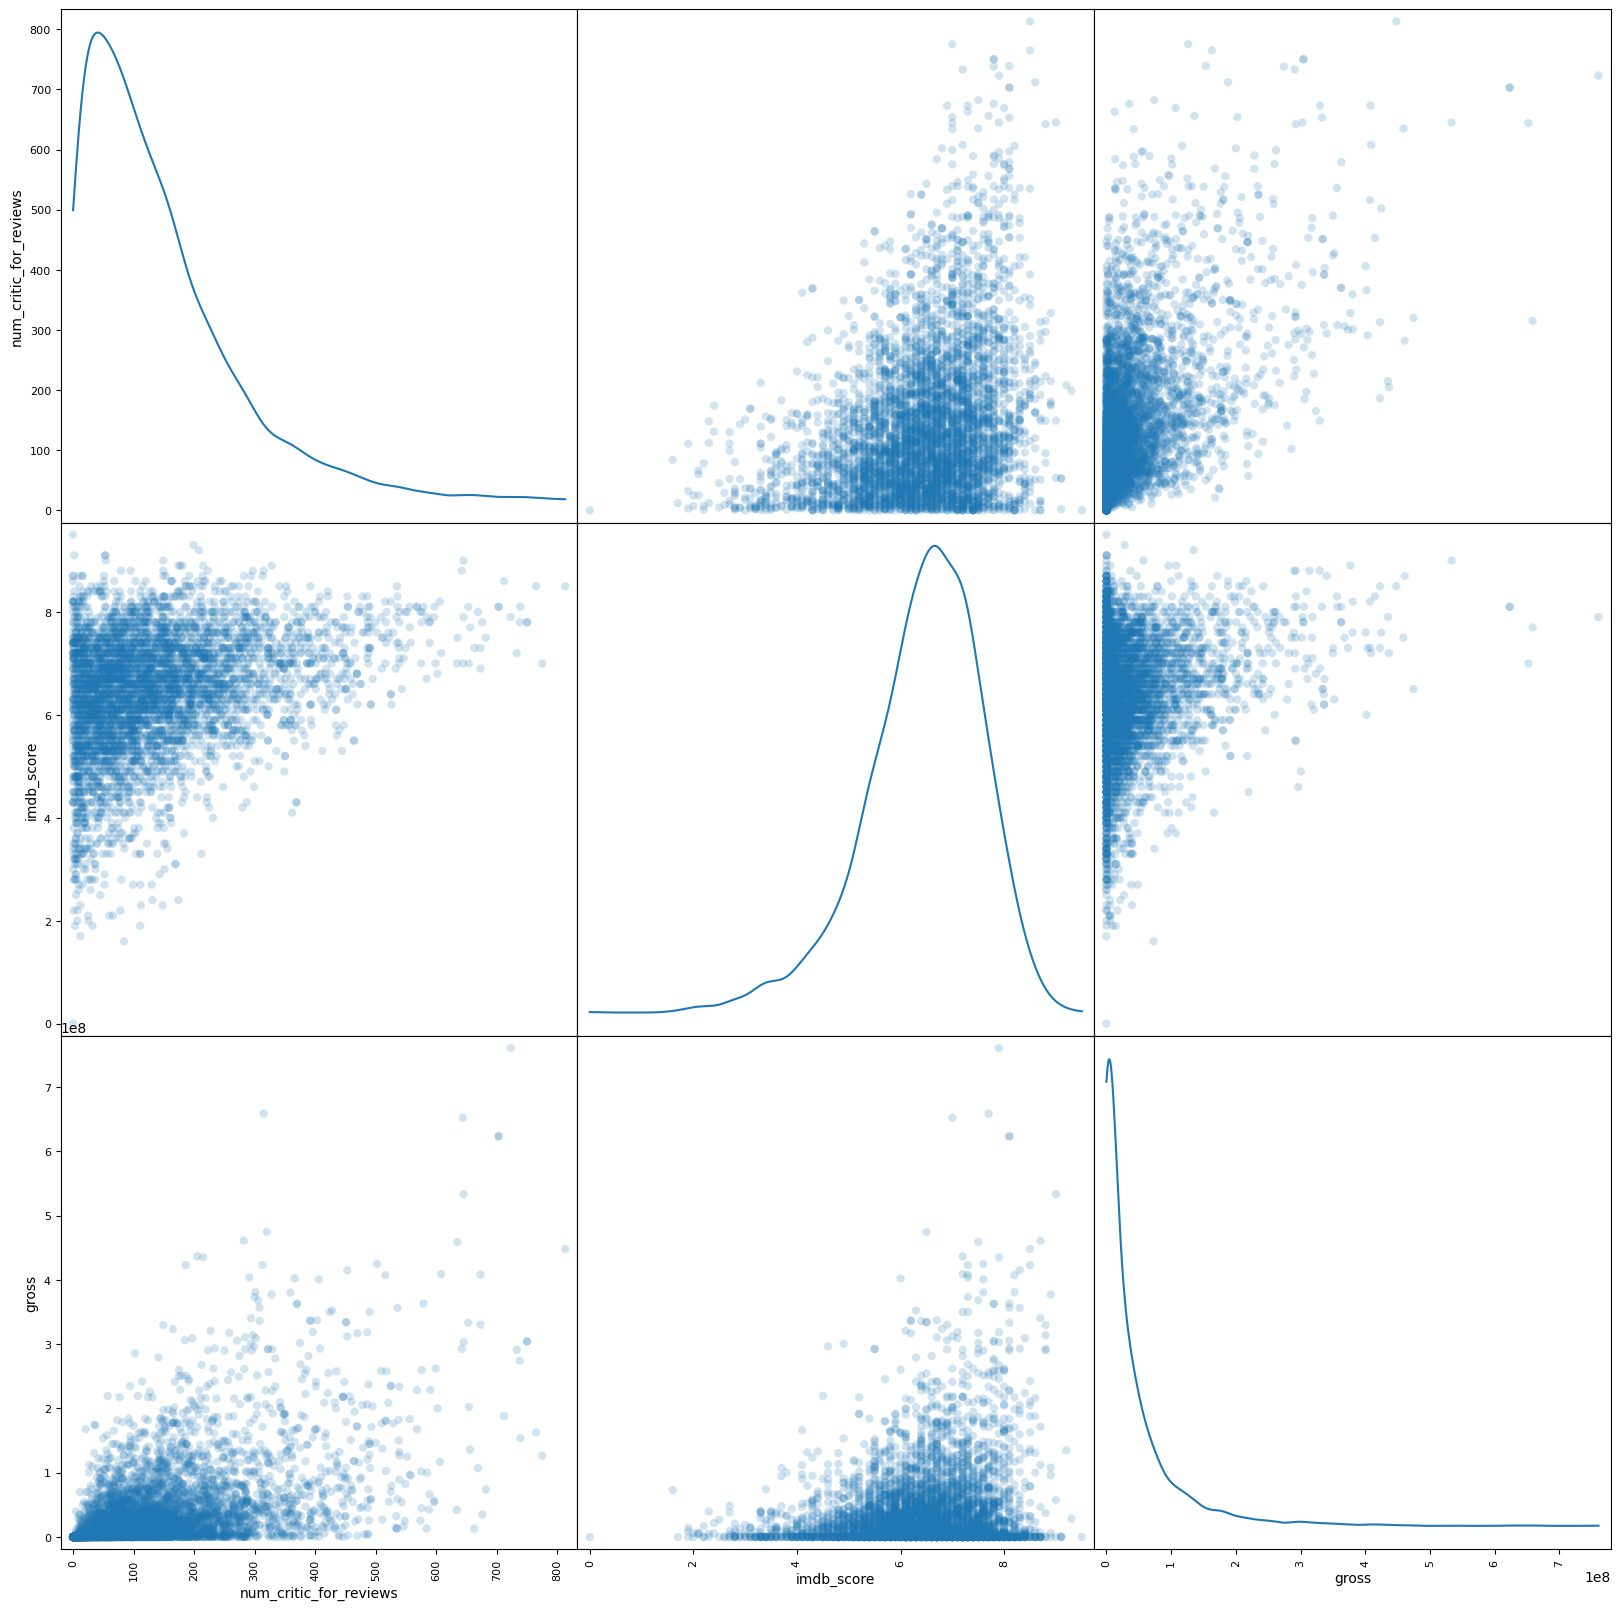

In [263]:
from pandas.plotting import scatter_matrix

cols = ["num_critic_for_reviews", "imdb_score", "gross"]
scatter_matrix(data[cols], alpha=0.2, figsize=(20, 20), 
               diagonal='kde', marker='o')
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [277]:
data['sales'] = data['gross'] - data['budget']

data[['movie_title', 'sales']]

,movie_title,sales
0,b'Avatar',523505847.0
1,"b""Pirates of the Caribbean: At World's End""",9404152.0
2,b'Spectre',-44925825.0
3,b'The Dark Knight Rises',198130642.0
4,b'Star Wars: Episode VII - The Force Awakens ...,0.0
...,...,...
5039,b'The Following ',0.0
5040,b'A Plague So Pleasant',-1400.0
5041,b'Shanghai Calling',10443.0
5042,b'My Date with Drew',84122.0


## Which directors garnered the most total sales?

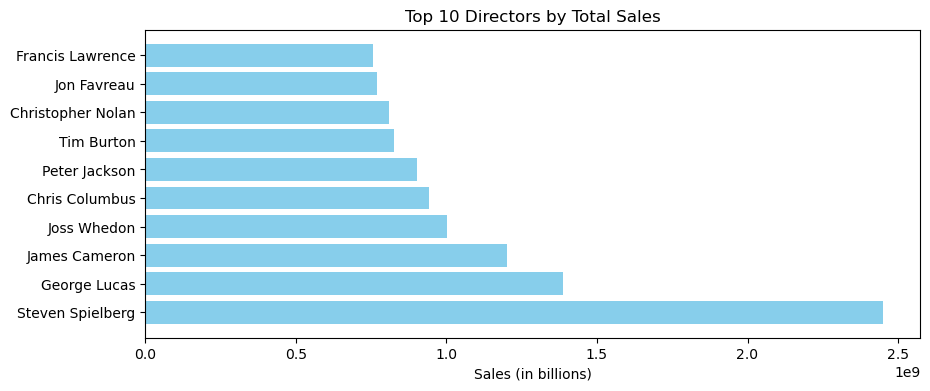

In [225]:
director_sales = data.groupby('director_name', as_index=False)['sales'].sum()

top10_director_sales = director_sales.nlargest(10, 'sales').reset_index(drop=True)

top10_director_sales['director_name']

plt.figure(figsize=(10, 4))
plt.barh(top10_director_sales['director_name'], top10_director_sales['sales'], color='skyblue')
plt.xlabel('Sales (in billions)')
plt.title('Top 10 Directors by Total Sales')
plt.show()

## Plot sales and average likes as a scatterplot. Fit it with a line.

In [297]:
data.average_likes.quantile(0.99)


30184.289999999997

In [299]:
data.sales.quantile(0.99)

197243982.28999966

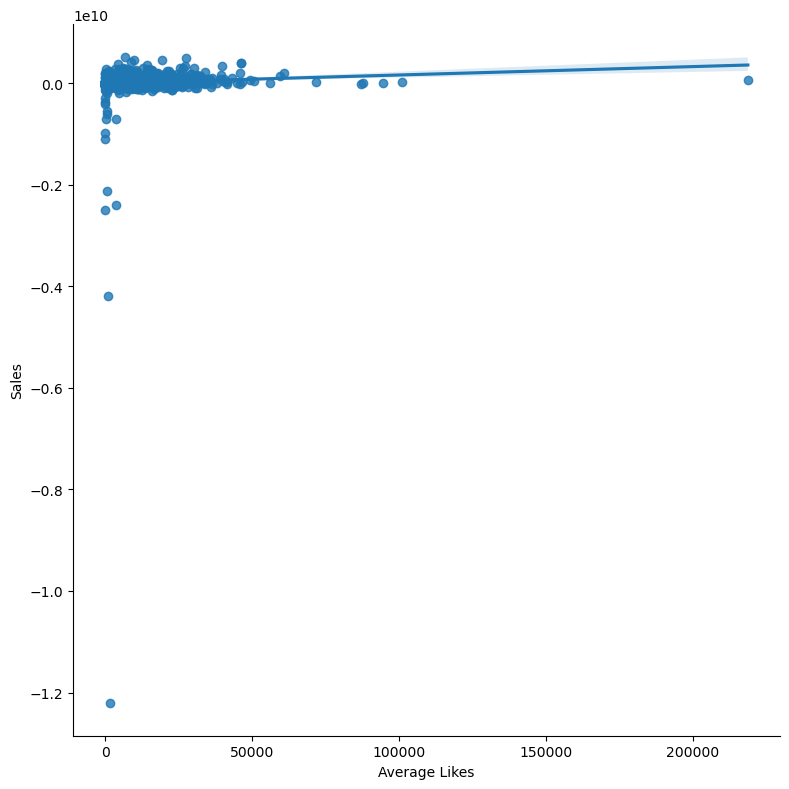

In [343]:
data['average_likes'] = data[[col for col in data.columns if col.endswith('facebook_likes')]].mean(axis=1)
                              
sns.lmplot(x="average_likes", y="sales", data=data, height=8)
plt.xlabel('Average Likes')
plt.ylabel('Sales')
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

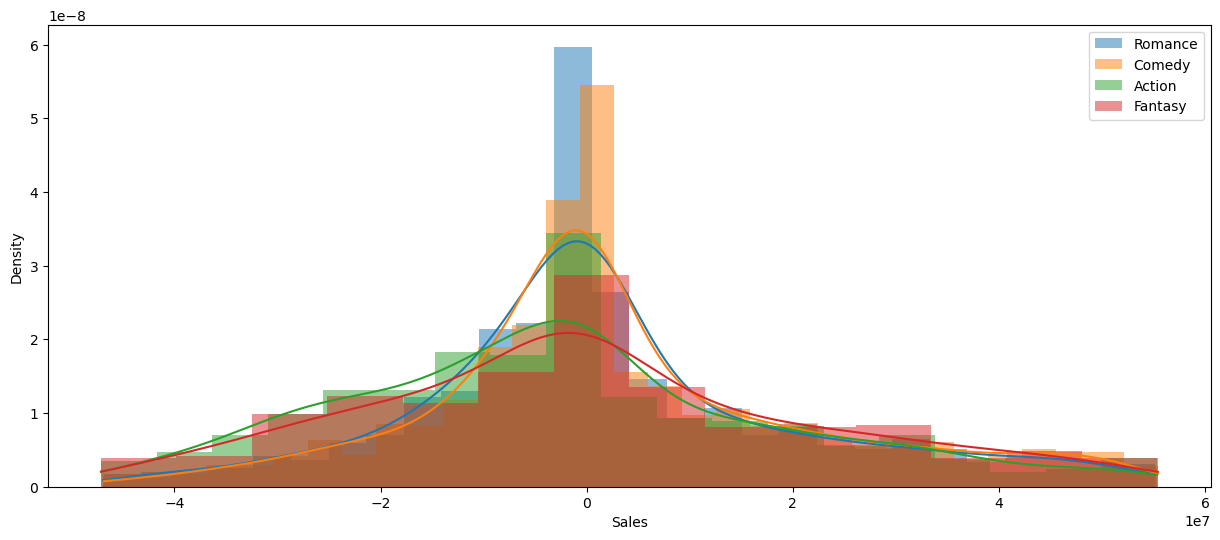

In [123]:
plt.figure(figsize=(15, 6))

ax =sns.histplot(filtered_data[filtered_data['genres'].str.contains("Romance", na=False)]['sales'], kde=True, label="Romance", stat="density", kde_kws={'bw_adjust': 1},linewidth=0)
sns.histplot(filtered_data[filtered_data['genres'].str.contains("Comedy", na=False)]['sales'], kde=True, label="Comedy", stat="density",kde_kws={'bw_adjust': 1},linewidth=0)
sns.histplot(filtered_data[filtered_data['genres'].str.contains("Action", na=False)]['sales'], kde=True, label="Action", stat="density", kde_kws={'bw_adjust': 1},linewidth=0)
sns.histplot(filtered_data[filtered_data['genres'].str.contains("Fantasy", na=False)]['sales'], kde=True, label="Fantasy", stat="density", kde_kws={'bw_adjust': 1},linewidth=0)
plt.xlabel('Sales')
plt.ylabel('Density')
ax.legend()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [147]:
data['average_actor_likes'] = data[[col for col in data.columns if col.startswith('actor') and col.endswith('likes')]].mean(axis=1)

data[['movie_title', 'average_actor_likes']].head()

,movie_title,average_actor_likes
0,b'Avatar',930.333333
1,"b""Pirates of the Caribbean: At World's End""",15333.333333
2,b'Spectre',3851.333333
3,b'The Dark Knight Rises',24333.333333
4,b'Star Wars: Episode VII - The Force Awakens ...,47.666667


## Copying the whole dataframe

In [353]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes,average_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333,6770.833333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333,15818.833333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333,18042.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333,60959.833333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667,69.500000


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [373]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

for columns in numeric_columns:
    min = df[columns].min()
    max = df[columns].max()

    df[columns] = (df[columns] - min) / (max - min)


df.head()

,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes,average_likes
0,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,1.000000,...,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261,0.030964
1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,0.406840,...,PG-13,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229,0.072341
2,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,0.263080,...,PG-13,0.020056,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017640,0.082510
3,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,0.589253,...,PG-13,0.020466,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.111450,0.278777
4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,0.000000,...,0,0.000000,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000218,0.000318
